# Validation of Nowicki and others (2014)

In this section, we demonstrate that our implementation of the Nowicki and others (2014) model yields approximately the same output as results reported in the original paper. There may be slight differences due to different shakemap versions or differences in the exact colorbars used.

### References
Nowicki, M.A., Wald, D.J., Hamburger, M.W., Hearne, Michael, and Thompson, E.M., 2014, Development of a globally applicable model for near real-time prediction of seismically induced landslides: Engineering Geology, v. 173, p. 54–65.


## Northridge earthquake



In [8]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import numpy as np
import matplotlib

#local imports
from gfail.logisticmodel import LogisticModel
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

import warnings
warnings.filterwarnings('ignore')

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/northridge'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/northridge'

# Path to config files
configfileN = '../defaultconfigfiles/models/nowicki_2014_global.ini'
mapconfig = '../defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/northridge.xml'

In [2]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileN)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)


In [3]:
# Run the model (this will take a minute)
lmn = LogisticModel(shakefile, config, saveinputs=True)
maplayers = lmn.calculate()

Loading friction layer: 0.1 sec
Loading cti1 layer: 0.1 sec
Loading slope layer: 0.1 sec


### Change bins to match figure from paper


In [6]:
lims = [np.arange(0., 0.55, 0.05)]
colorlist = ['#563F66','#343274', '#2F56A5', '#7CAADA', '#A1C1B6', '#E3E6A1', '#E3BD60', '#BD674C', '#DFBCA6', '#F7EEE6']  #hex code for colors in figure below
CustomCmap = matplotlib.colors.ListedColormap(list(reversed(colorlist)))
colormap = [CustomCmap]
#bounds = dict(xmin=120.6, xmax=121.5, ymin=23.1, ymax=25.)
bounds = dict(xmin=-119.1, xmax=-118.2, ymin=34., ymax=34.7)
#maskthresh = [0.]  # to represent gray color on figure

### Create the figure

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed

No output location given, using current directory for outputs

Not able to read specified ocean file, will use default ocean masking


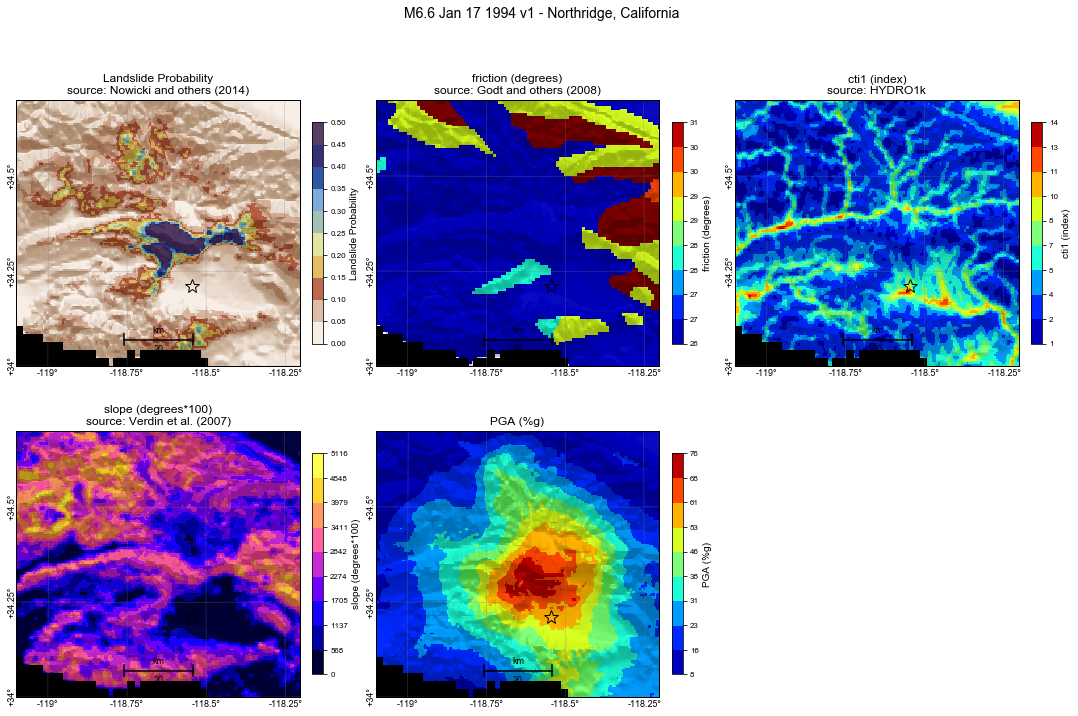

In [7]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

# get plotting info from config for each layer
plotorder, logscale, lims1, colormaps, maskthreshes = parseConfigLayers(maplayers, config)
lims = lims + lims1[1:]
colormaps = colormap + colormaps[1:]

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=None, plotorder=plotorder,
         logscale=False, maproads=False, mapcities=False, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormaps, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/nowicki2014_northridge.png" alt="From Paper" style="width: 500px;" align="left"/>